In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
game_events = pd.read_csv('../csv/game_events.csv')

### Step 1: Data Understanding ###
+ Dataframe shape
+ head 
+ dtypes
+ describe

In [3]:
game_events.shape

(666558, 10)

In [4]:
game_events.head(20)

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
0,2f41da30c471492e7d4a984951671677,2012-08-05,2211607,77,Cards,610,4425,"1. Yellow card , Mass confrontation",NaN,NaN
1,a72f7186d132775f234d3e2f7bc0ed5b,2012-08-05,2211607,77,Cards,383,33210,"1. Yellow card , Mass confrontation",NaN,NaN
2,b2d721eaed4692a5c59a92323689ef18,2012-08-05,2211607,3,Goals,383,36500,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,56416.0
3,aef768899cedac0c9a650980219075a2,2012-08-05,2211607,53,Goals,383,36500,", Right-footed shot, 2. Tournament Goal Assist...",NaN,146258.0
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0,NaN
5,eef9c46dd75c3aa4c6a503225427446e,2012-08-05,2211607,11,Goals,383,38497,", Right-footed shot, 1. Tournament Goal Assist...",NaN,33210.0
6,5d5aef7dedcd5dc9d35dea9438ee35e0,2012-08-05,2211607,90,Cards,610,42710,1. Yellow card,NaN,NaN
7,7717860e3b0376b86f445f4749fa2ce5,2012-08-05,2211607,44,Goals,610,42710,", Header, 1. Tournament Goal Assist: , Corner,...",NaN,4425.0
8,02c708273f4fa2003873ef5908e4e3a6,2012-08-05,2211607,79,Cards,610,45509,1. Yellow card,NaN,NaN
9,d1be2ce4bd5f0ca091c1b15a8569301c,2012-08-05,2211607,90,Goals,383,49499,", Right-footed shot, 1. Tournament Goal Assist...",NaN,167850.0


In [5]:
game_events.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description', 'player_in_id', 'player_assist_id'],
      dtype='object')

In [6]:
game_events.dtypes #id in float?

game_event_id        object
date                 object
game_id               int64
minute                int64
type                 object
club_id               int64
player_id             int64
description          object
player_in_id        float64
player_assist_id    float64
dtype: object

In [7]:
game_events['type'].value_counts().unique

<bound method Series.unique of type
Substitutions    421908
Goals            180901
Cards             62473
Shootout           1276
Name: count, dtype: int64>

<h1>description of each column:<h1>

+ game_event_id: Identifier for each game event.
+ date: Date of the game event, stored in the format YYYY-MM-DD.
+ game_id: Identifier for each game.
+ minute: Minute of the game when the event occurred.
+ type: Type of game event, such as goals, substitutions, or cards.
+ club_id: Identifier for the club associated with the event.
+ player_id: Identifier for the player involved in the event.
+ description: Description of the event, often containing details like the type of shot or the assist.
+ player_in_id: Identifier for the player who entered the game (applicable for substitution events).
+ player_assist_id (float64): Identifier for the player who assisted in the event (applicable for goals).

### Step 2: Data Preperation ###
+ Dropping irrelevant columns and rows (NaN)
+ Identifying duplicated columns
+ Feature Creation

In [8]:
game_events.isna().sum() 

game_event_id            0
date                     0
game_id                  0
minute                   0
type                     0
club_id                  0
player_id                0
description         336325
player_in_id        245309
player_assist_id    635701
dtype: int64

In [9]:
game_events.loc[game_events['description'].isnull()]

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
26555,e4d512124476ec9412a40b6a5992ee2f,2012-08-22,2235964,81,Substitutions,10468,121235,NaN,121027.0,NaN
26557,ac641aeaaf272da2f7e39427fe5e03c8,2012-08-22,2235964,66,Substitutions,10468,201284,NaN,113699.0,NaN
28472,9e4d13d444aa9315f9fb56ef075faf23,2013-02-17,2240152,81,Substitutions,1465,17352,NaN,125700.0,NaN
28473,4bc0bb78995d14303a22390aeec4e601,2013-02-17,2240152,62,Substitutions,1301,24880,NaN,237663.0,NaN
28475,b08ec33cbbcb9be738f1525e8d09d4e1,2013-02-17,2240152,65,Substitutions,1465,42303,NaN,150535.0,NaN
...,...,...,...,...,...,...,...,...,...,...
666389,1ab6aea19aa0cdefb8a6499315fd4c04,2023-11-22,4227848,73,Substitutions,29397,348953,NaN,582949.0,NaN
666390,d5c714db0319a34d9355e8a1d8962dca,2023-11-22,4227848,80,Substitutions,29397,451684,NaN,945223.0,NaN
666391,cda3609ab4adfb44d5ed93af837ce4a1,2023-11-22,4227848,66,Substitutions,3060,491648,NaN,118302.0,NaN
666392,67a2fab497298fc8307e05e2a4df7098,2023-11-22,4227848,66,Substitutions,3060,502893,NaN,495489.0,NaN


In [10]:
Nan_Des = game_events.loc[game_events['description'].isnull()]
Nan_Des['type'].unique() #so when description is null, it is a substitutions game events. See other nan values

array(['Substitutions'], dtype=object)

In [11]:
Nan_Des.shape

(336325, 10)

In [12]:
Nan_player_in = game_events.loc[game_events['player_in_id'].isnull()]
Nan_player_in['type'].unique() #in Cards, Goals or shootout events is normal that there is no value

array(['Cards', 'Goals', 'Substitutions', 'Shootout'], dtype=object)

In [13]:
Nan_player_in.shape

(245309, 10)

In [14]:
Nan_player_in.isna().sum() #In some substitutions no one enters, they look like incoherent data

game_event_id            0
date                     0
game_id                  0
minute                   0
type                     0
club_id                  0
player_id                0
description            582
player_in_id        245309
player_assist_id    214452
dtype: int64

In [15]:
Nan_player_in.loc[Nan_player_in['description'].isnull()]

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
147900,dd26ed0a91fed1b8ba57292204d944d3,2014-12-06,2460748,88,Substitutions,79,86202,NaN,NaN,NaN
150622,21056a64f814010db0b8ced0f1bace9d,2014-07-27,2469421,74,Substitutions,5817,264299,NaN,NaN,NaN
150734,7afe7889754fc042f6bf1be23b22555c,2014-08-15,2469452,90,Substitutions,865,22499,NaN,NaN,NaN
151046,86200f245b963544c208a117ca824951,2014-12-01,2469539,90,Substitutions,1465,152176,NaN,NaN,NaN
152298,e7d5d169f9fb1c186cee0782b455b830,2014-12-22,2470056,85,Substitutions,126,59931,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
659890,8bd30a176cfa51e23d9fb2903fff2b95,2023-09-23,4173734,80,Substitutions,13677,841413,NaN,NaN,NaN
659936,a9f802fe7c7009f9c75bd6ca4c44f132,2023-09-23,4173741,77,Substitutions,10597,196141,NaN,NaN,NaN
659940,61b3ee32fff6d7fa21a1dabc00fcaeea,2023-09-23,4173741,77,Substitutions,10597,401680,NaN,NaN,NaN
661023,7bd5ae5d5ec726cb017111f6422b3c9f,2023-10-04,4181478,82,Substitutions,20979,542556,NaN,NaN,NaN


In [16]:
Nan_player_in[(Nan_player_in['type'] == 'Substitutions') & Nan_player_in[['description', 'player_in_id', 'player_assist_id']].isna().all(axis=1)].shape[0]
#Count rows where all three columns are null 
#So we can remove there row, because are equal to the missing description number

582

In [17]:
# Createone boolean mask for identifing all the rows of type = substitution with NaN value for each of 3 columns 
mask = (game_events['type'] == 'Substitutions') & game_events['description'].isnull() & game_events['player_in_id'].isnull() & game_events['player_assist_id'].isnull()
# remove the rows that satisfied the mask 
game_events = game_events.drop(game_events[mask].index)

In [18]:
game_events.shape

(665976, 10)

In [19]:
game_events.query("type == 'Shootout'") #Maybe this is Penalty kick

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
613529,18795095e32877ef0693f6a1b8e2d878,2023-01-11,3998376,-1,Shootout,418,18922,", Scored",NaN,NaN
613530,42d801700d04daea6e068fa367be9e4f,2023-01-11,3998376,-1,Shootout,418,27992,", Scored",NaN,NaN
613531,eec64a5579045e749fc7c37df5d0ace9,2023-01-11,3998376,-1,Shootout,418,31909,", Scored",NaN,NaN
613533,4667fa4fd349c761c988a53eab4f2726,2023-01-11,3998376,-1,Shootout,1049,48280,", Scored",NaN,NaN
613536,fb88bbeacc69cb5582b05a870f7c1138,2023-01-11,3998376,-1,Shootout,1049,221322,", Saved",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
666515,cfe2e2c9bdebe69d5f2a115b089d29eb,2023-11-14,4227998,-1,Shootout,1072,485994,", Scored",NaN,NaN
666518,192d0d70152ad2caa9012b8cfbe5f144,2023-11-14,4227998,-1,Shootout,1072,552615,", Saved",NaN,NaN
666521,04dbf4c98add438c33a61f93ee2e3f5e,2023-11-14,4227998,-1,Shootout,34888,583997,", Saved",NaN,NaN
666524,922f918f7d1df11e6581bce2936d0edf,2023-11-14,4227998,-1,Shootout,1072,701062,", Scored",NaN,NaN


In [20]:
Nan_player_assist = game_events.loc[game_events['player_assist_id'].isnull()]
Nan_player_assist['type'].unique() 

array(['Cards', 'Substitutions', 'Goals', 'Shootout'], dtype=object)

In [21]:
Nan_player_assist.isna().sum()

game_event_id            0
date                     0
game_id                  0
minute                   0
type                     0
club_id                  0
player_id                0
description         335743
player_in_id        213870
player_assist_id    635119
dtype: int64

In [22]:
game_events.duplicated().sum()

0

<h1>CREATE NEW DATASET<h1>

In [23]:
substitution = game_events.loc[game_events['type'] == 'Substitutions']

In [24]:
substitution.shape

(421326, 10)

In [25]:
substitution.isna().sum()

game_event_id            0
date                     0
game_id                  0
minute                   0
type                     0
club_id                  0
player_id                0
description         335743
player_in_id            77
player_assist_id    421326
dtype: int64

In [26]:
substitution = substitution[['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description', 'player_in_id']]


In [27]:
substitution.loc[substitution['description'].notna()] 

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id
4,5d6d9533023057b6619ecd145a038bbe,2012-08-05,2211607,74,Substitutions,383,36500,", Not reported",49499.0
10,f0dfb41b779ad8efbd5acbd0aeedff11,2012-08-05,2211607,76,Substitutions,610,52246,", Not reported",182932.0
13,e67340caefbf1cbe1be393d3d61448e1,2012-08-05,2211607,84,Substitutions,383,72462,", Not reported",167850.0
14,ac69368250666fd5e9d142f53f1e539f,2012-08-05,2211607,65,Substitutions,610,95755,", Not reported",34784.0
17,584282a7024a5a6da90cbb20317111ff,2012-08-05,2211607,76,Substitutions,610,187245,", Not reported",111184.0
...,...,...,...,...,...,...,...,...,...
666550,7b89ec7d57033c6783b80a4ab248b947,2023-11-15,4228114,59,Substitutions,46889,814815,", Tactical",550816.0
666551,503bec0b5797d85f747a4aaf1c23b308,2023-11-15,4228114,63,Substitutions,46889,839808,", Injury",1203716.0
666553,7f5a6b61ca858e0cd63a58c554b56bb7,2023-11-15,4228114,82,Substitutions,358,874064,", Tactical",965607.0
666555,d638b1e72f531c413487d413258a3130,2023-11-15,4228114,68,Substitutions,46889,922572,", Tactical",1200869.0


In [28]:
substitution['description'].unique()

array([', Not reported', ', Tactical', ', Delay', ', Resting', ', Injury',
       ', Risk of booking', ', Special achievements',
       ', Substitution without replacement', nan], dtype=object)

In [29]:
substitution['description'].fillna(', Not reported', inplace=True)

In [30]:
substitution.loc[substitution['player_in_id'].isna()]  #substitution need a player_in_id

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id
16280,ab4e2ad6d50ee8cd1927934938c658a7,2012-09-23,2225462,90,Substitutions,31,78959,", Substitution without replacement",NaN
16727,af8264d946665c974ee98f2f6cad5433,2012-10-07,2225500,76,Substitutions,405,90964,", Substitution without replacement",NaN
26969,ee4cbac0bc20bce458d0336b350f5410,2012-10-07,2240047,80,Substitutions,720,79960,", Substitution without replacement",NaN
31617,e3a71e2f06aeba3432625243d2ae3905,2012-11-11,2242924,73,Substitutions,3709,16315,", Substitution without replacement",NaN
32378,b82273ce2950e288f17ba294c99fdcf5,2013-05-08,2242976,82,Substitutions,418,35664,", Substitution without replacement",NaN
...,...,...,...,...,...,...,...,...,...
659899,8ebb237e92a929015c051f77785cc2f1,2023-09-23,4173734,80,Substitutions,13677,1063673,", Tactical",NaN
660645,fdb6184fe2f9a4b19c2800716845ad20,2023-09-26,4180926,83,Substitutions,112611,615993,", Not reported",NaN
661027,585fbb999f872674039dd01d9b5374bf,2023-10-04,4181478,62,Substitutions,20979,695761,", Not reported",NaN
661317,22fbe29bade214c06945c6f8133b98a2,2023-09-16,4182474,87,Substitutions,41231,371856,", Substitution without replacement",NaN


In [31]:
substitution = substitution.loc[~substitution['player_in_id'].isna()] 

In [32]:
substitution.isna().sum()

game_event_id    0
date             0
game_id          0
minute           0
type             0
club_id          0
player_id        0
description      0
player_in_id     0
dtype: int64

In [33]:
cards = game_events.loc[game_events['type'] == 'Cards']

In [34]:
cards.shape

(62473, 10)

In [35]:
cards.isna().sum()

game_event_id           0
date                    0
game_id                 0
minute                  0
type                    0
club_id                 0
player_id               0
description             0
player_in_id        62473
player_assist_id    62473
dtype: int64

In [36]:
cards = cards[['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description']] #remove columns
cards.shape

(62473, 8)

In [37]:
cards['description'].unique()

array(['1. Yellow card  , Mass confrontation', '1. Yellow card',
       'Red card  , Abuse', 'Yellow card', 'Second yellow  , Foul',
       '1. Yellow card  , Dissent', '1. Yellow card  , Foul',
       '1. Yellow card  , Serious foul', 'Yellow card  , Foul',
       'Second yellow  , Unsporting behaviour',
       'Second yellow  , Repeated Foul', 'Red card  , Violent conduct',
       '1. Yellow card  , Shooting ball', 'Red card  , Professional foul',
       '1. Yellow card  , Diving', '1. Yellow card  , Time wasting',
       '1. Yellow card  , Unsporting behaviour',
       '1. Yellow card  , Taking of shirt',
       '1. Yellow card  , Professional foul', 'Red card',
       '2. Yellow card', '3. Yellow card',
       '3. Yellow card  , Professional foul', '4. Yellow card  , Foul',
       '4. Yellow card  , Professional foul',
       '2. Yellow card  , Taking of shirt', '3. Yellow card  , Foul',
       '2. Yellow card  , Foul', 'Second yellow  , Dissent',
       '3. Yellow card  , Unsporti

In [38]:
tot_red_cards = cards.query("description == 'Red card  , Abuse'") 
tot_red_cards.shape

(64, 8)

In [39]:
second_yellow = cards.query("description == 'Second yellow  , Foul'")
second_yellow.shape

(528, 8)

In [40]:
goal = game_events.loc[game_events['type'] == 'Goals']

In [41]:
goal.shape

(180901, 10)

In [42]:
goal.isna().sum()

game_event_id            0
date                     0
game_id                  0
minute                   0
type                     0
club_id                  0
player_id                0
description              0
player_in_id        180901
player_assist_id    150044
dtype: int64

In [43]:
goal = goal[['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description', 'player_assist_id']]
goal.shape

(180901, 9)

In [44]:
goal.loc[goal['player_assist_id'] == 0] #so, we can swap NaN value with 0 for maintain goal with assist and goals  

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_assist_id


In [45]:
goal['player_assist_id'].fillna(0, inplace = True)
goal.isna().sum()

game_event_id       0
date                0
game_id             0
minute              0
type                0
club_id             0
player_id           0
description         0
player_assist_id    0
dtype: int64

In [46]:
shootout =  game_events.loc[game_events['type'] == 'Shootout']

In [47]:
shootout.shape

(1276, 10)

In [48]:
shootout.isna().sum()

game_event_id          0
date                   0
game_id                0
minute                 0
type                   0
club_id                0
player_id              0
description            0
player_in_id        1276
player_assist_id    1276
dtype: int64

In [49]:
shootout = shootout[['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description']]
shootout.shape

(1276, 8)

In [50]:
shootout.head(20)

,game_event_id,date,game_id,minute,type,club_id,player_id,description
613529,18795095e32877ef0693f6a1b8e2d878,2023-01-11,3998376,-1,Shootout,418,18922,", Scored"
613530,42d801700d04daea6e068fa367be9e4f,2023-01-11,3998376,-1,Shootout,418,27992,", Scored"
613531,eec64a5579045e749fc7c37df5d0ace9,2023-01-11,3998376,-1,Shootout,418,31909,", Scored"
613533,4667fa4fd349c761c988a53eab4f2726,2023-01-11,3998376,-1,Shootout,1049,48280,", Scored"
613536,fb88bbeacc69cb5582b05a870f7c1138,2023-01-11,3998376,-1,Shootout,1049,221322,", Saved"
613537,1683ba78730c52858b6e55c86330be53,2023-01-11,3998376,-1,Shootout,418,296622,", Scored"
613539,2eef23ea87028cb9f73607afa209e07f,2023-01-11,3998376,-1,Shootout,1049,298583,", Missed"
613548,1b8aeff356bdfa10c7da36e6dffecf97,2023-01-11,3998376,-1,Shootout,1049,495629,", Scored"
613550,ff09ec00c5c6cd7fee36958cc68af229,2023-01-11,3998376,-1,Shootout,1049,617074,", Scored"
613558,60b679068f9819c569e00976a644c700,2023-01-12,3998377,-1,Shootout,131,38253,", Scored"


<h1> Casting dtypes </h3>

In [51]:
substitution['player_in_id'] = substitution['player_in_id'].astype(int)
goal['player_assist_id'] = goal['player_assist_id'].astype(int)

### Step 3: Feature Understanding ###
Different analysis for every type of game_events
+ My questions
       + What are the 5 or 10 games with multiple events? And for each type of event? 
       + How many values are there for each type of event
       + What is the date where there were multiple events? And for each type of event?
       + Which are the clubs where there were more events? And for each type of event?
       + How many events happen after the 90 minute and what type are they?
       + What are the 5 Players that scored the most shootout?
       + What are the 5 Players that missed the most shootouts?
       + How many shootouts were scored? How many missed and how many saved?
       + How many reasons for substitutions?
       + Which are the players that take over most often?
       + What are the main reasons for giving cards?
       + Which players have more cards?
       + Which are the five players with more goals in general? And with assists and without assists?
+ Plotting Feature Distributions
       + Bar Chart

<h2> Game Events<h2>

In [52]:
copy_game_events = game_events[['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id']].copy()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '4181024'),
  Text(1, 0, '4148218'),
  Text(2, 0, '4162648'),
  Text(3, 0, '4168263'),
  Text(4, 0, '4089276')])

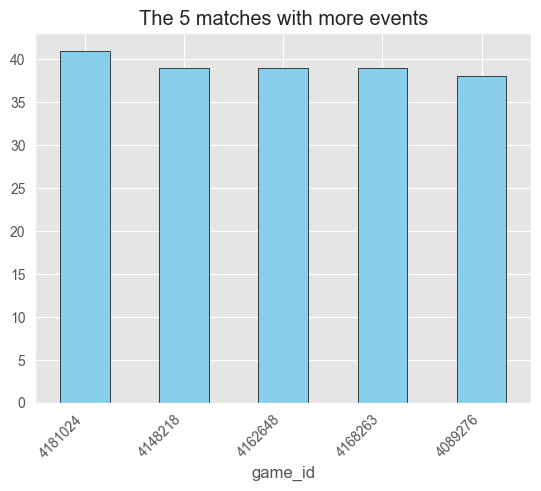

In [53]:
copy_game_events.groupby('game_id').count()['game_event_id'].nlargest(5).plot(kind = 'bar',
                                                                          title = 'The 5 matches with more events',
                                                                          y = "Number of events",
                                                                          color = "skyblue",
                                                                          edgecolor = "black")
plt.xticks(rotation=45, ha='right')

In [54]:
copy_game_events.query(" game_id == 2218677")

,game_event_id,date,game_id,minute,type,club_id,player_id
18,ed9bded6064e693d92634a764cfd3e1a,2012-08-11,2218677,76,Cards,506,2865
19,fead616bb25013d5cb15d9fe7f12880e,2012-08-11,2218677,89,Substitutions,506,2865
20,2ffa0f67024c418c1f45e0b46b64eb7f,2012-08-11,2218677,52,Cards,6195,5858
21,4f3cd2789c256c62c092494a547a8bed,2012-08-11,2218677,62,Substitutions,6195,5858
22,4d35cfa33a6e61c743c04e7483c778fd,2012-08-11,2218677,101,Goals,506,6448
23,c8a234f070eb5ebbccb07feabd2818d4,2012-08-11,2218677,86,Cards,6195,12563
24,726d818a55fb9c77d981eb2512253e00,2012-08-11,2218677,41,Goals,6195,12563
25,ba03d3a1bde4d0a317d96b9223477f69,2012-08-11,2218677,105,Substitutions,6195,19041
26,73e63e65cf095e9223244061e30b590b,2012-08-11,2218677,97,Goals,506,21151
27,fb2f257ac6207a5e48aee11d6e009468,2012-08-11,2218677,53,Cards,6195,21905


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Cards'),
  Text(1, 0, 'Goals'),
  Text(2, 0, 'Shootout'),
  Text(3, 0, 'Substitutions')])

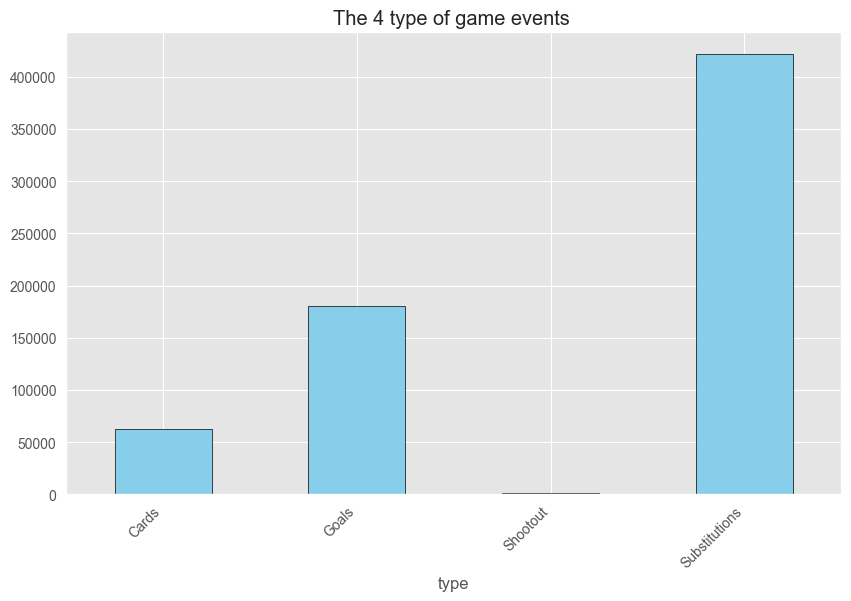

In [55]:
copy_game_events.groupby('type').count()['game_event_id'].plot(kind = 'bar',
                                                                          title = 'The 4 type of game events ',
                                                                          figsize = (10,6),
                                                                          y = "Number of events",
                                                                          color = "skyblue",
                                                                          edgecolor = "black")
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2023-11-01'),
  Text(1, 0, '2012-11-03'),
  Text(2, 0, '2023-11-04'),
  Text(3, 0, '2023-08-12'),
  Text(4, 0, '2023-09-03')])

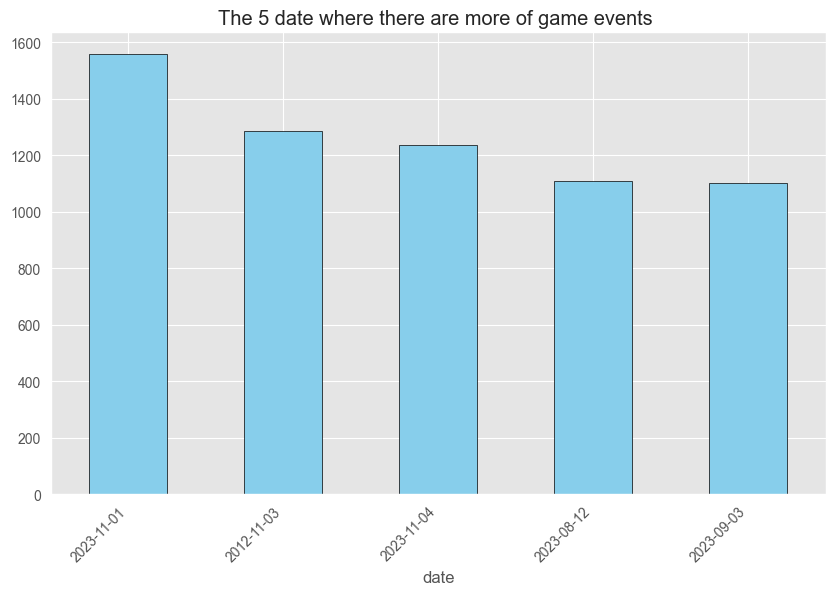

In [56]:
copy_game_events.groupby('date').count()['game_event_id'].nlargest(5).plot(kind = 'bar',
                                                                          title = 'The 5 date where there are more of game events ',
                                                                          figsize = (10,6),
                                                                          y = "Number of events",
                                                                          color = "skyblue",
                                                                          edgecolor = "black")
plt.xticks(rotation=45, ha='right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '418'),
  Text(1, 0, '131'),
  Text(2, 0, '27'),
  Text(3, 0, '368'),
  Text(4, 0, '281')])

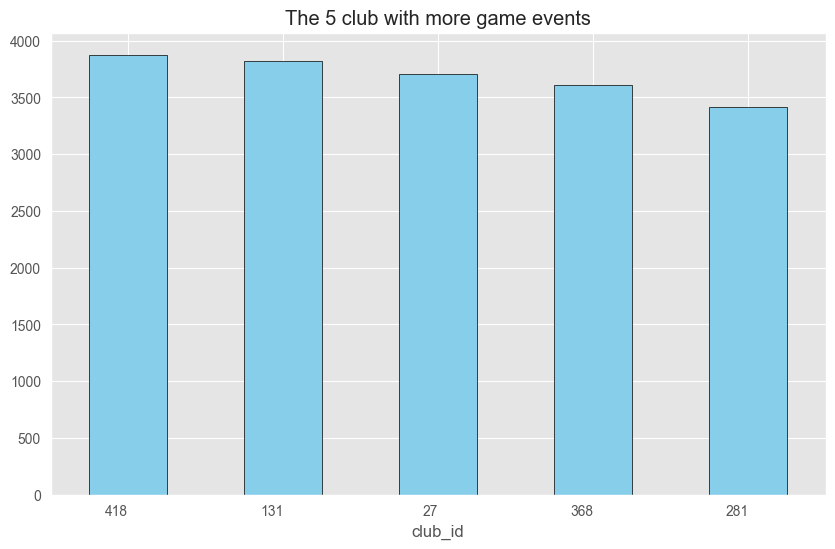

In [89]:
copy_game_events.groupby('club_id').count()['game_event_id'].nlargest(5).plot(kind='bar',
                                                                             title='The 5 club with more game events',
                                                                             figsize=(10, 6),
                                                                             color='skyblue',
                                                                             edgecolor='black')
plt.xticks(rotation=0, ha='right')

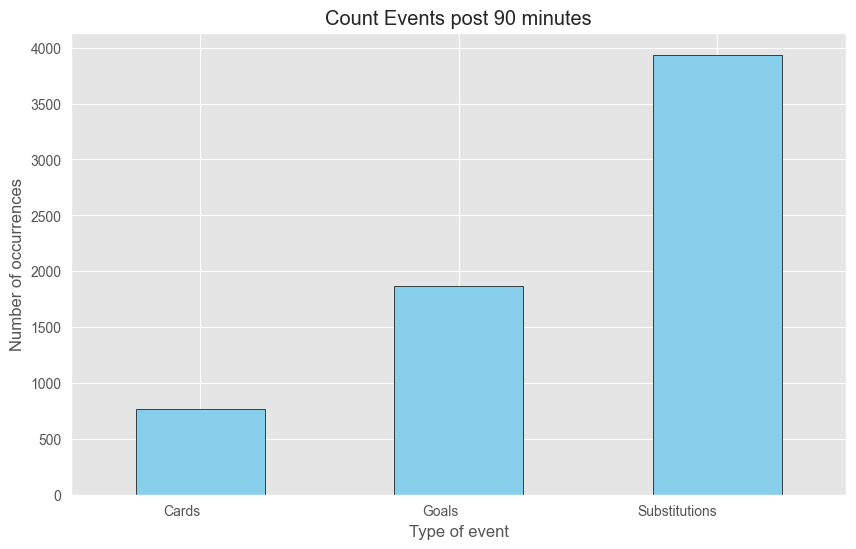

In [90]:
events_after_90 = copy_game_events.loc[copy_game_events['minute'] > 90]
event_type_counts = events_after_90.groupby('type').size()  
event_type_counts.plot(kind='bar',
                       title= 'Count Events post 90 minutes',
                       figsize=(10, 6),
                       color='skyblue',
                       edgecolor='black')
plt.xlabel('Type of event')
plt.ylabel('Number of occurrences')
plt.xticks(rotation=0, ha='right')
plt.show()


<h2> ShootOut <h2>

In [60]:
shootout.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description'],
      dtype='object')

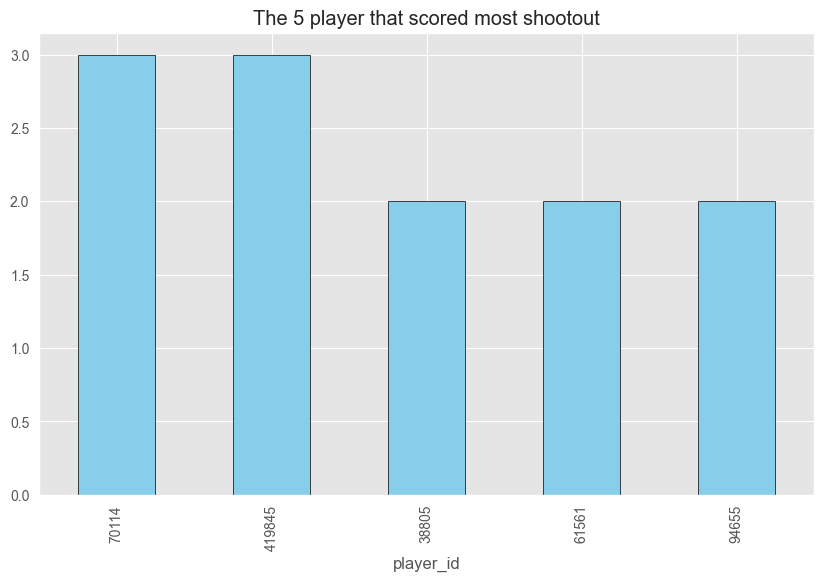

In [61]:
scored_goals = shootout[shootout['description'] == ', Scored']
goals_per_player = scored_goals.groupby('player_id').size().nlargest(5).plot(kind = "bar",
                                                                           title = 'The 5 player that scored most shootout',
                                                                          figsize = (10,6),
                                                                          y = "Number of scored",
                                                                          color = "skyblue",
                                                                          edgecolor = "black")


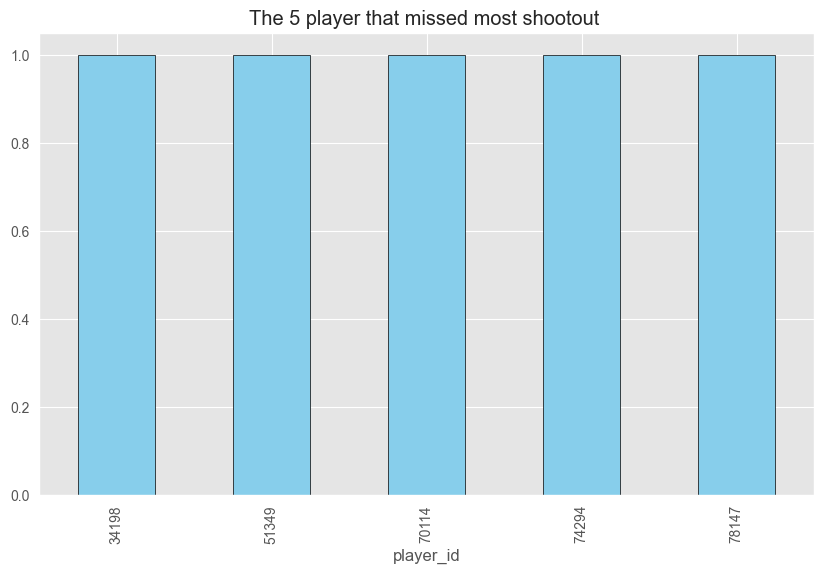

In [62]:
scored_goals = shootout[shootout['description'] == ', Missed']
goals_per_player = scored_goals.groupby('player_id').size().nlargest(5).plot(kind = "bar",
                                                                           title = 'The 5 player that missed most shootout ',
                                                                          figsize = (10,6),
                                                                          y = "Number of missed",
                                                                          color = "skyblue",
                                                                          edgecolor = "black")

In [63]:
shootout.query("player_id == 8187")

,game_event_id,date,game_id,minute,type,club_id,player_id,description
664632,c7dbb2f1d8d0a36ec0a26b19a082261b,2023-11-01,4204047,-1,Shootout,4054,8187,", Scored"


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '4089276'),
  Text(1, 0, '4164105'),
  Text(2, 0, '4168263'),
  Text(3, 0, '4137111'),
  Text(4, 0, '4181747')])

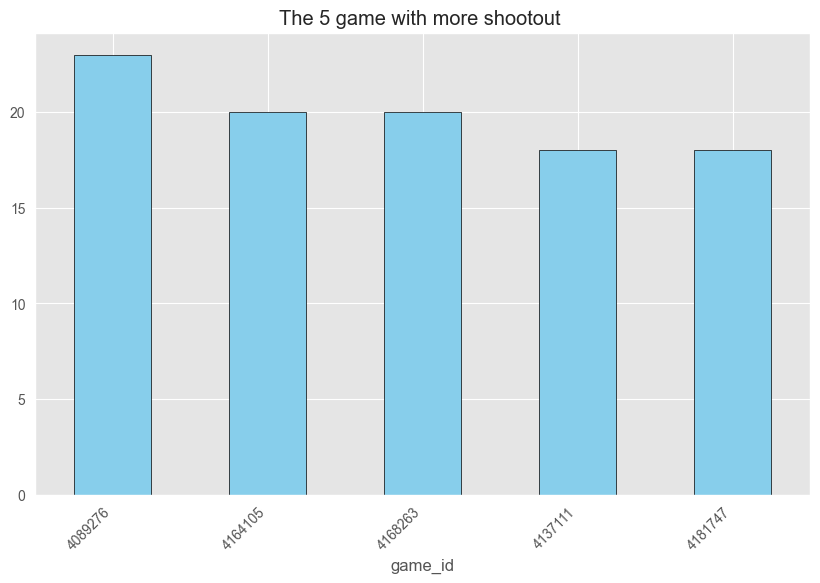

In [64]:
shootout.groupby('game_id').count()['description'].nlargest(5).plot(kind = 'bar',
                                                                title = 'The 5 game with more shootout ',
                                                                figsize = (10,6),
                                                                y = "Number of shootout",
                                                                color = "skyblue",
                                                                edgecolor = "black")
plt.xticks(rotation=45, ha='right')

In [65]:
shootout['description'].value_counts()


description
, Scored    921
, Saved     214
, Missed    141
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, ', Missed'), Text(1, 0, ', Saved'), Text(2, 0, ', Scored')])

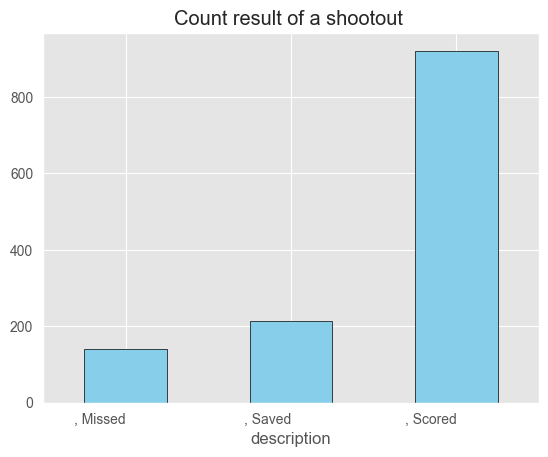

In [91]:
shootout.groupby('description').size().plot(kind = 'bar',
                                            title = 'Count result of a shootout ',
                                            y = "Number of occurrences",
                                            color = "skyblue",
                                            edgecolor = "black")
plt.xticks(rotation=0, ha='right')

<h2>Substitutions<h2>

In [67]:
substitution.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description', 'player_in_id'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2884392'),
  Text(1, 0, '2901276'),
  Text(2, 0, '3935080'),
  Text(3, 0, '2740103'),
  Text(4, 0, '3446615'),
  Text(5, 0, '3462162'),
  Text(6, 0, '3462163'),
  Text(7, 0, '3468614'),
  Text(8, 0, '3487510'),
  Text(9, 0, '3490806')])

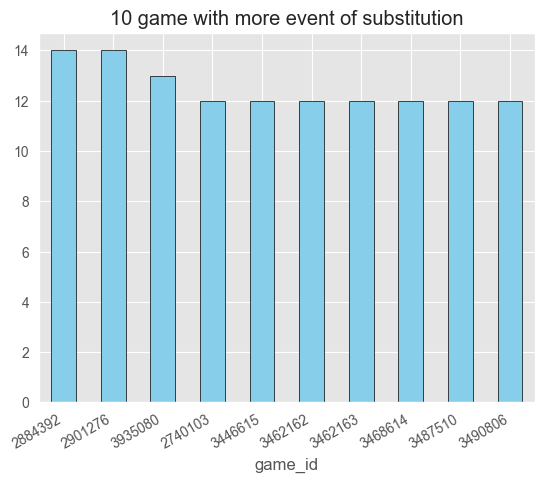

In [92]:
substitution.groupby('game_id').count()['game_event_id'].nlargest(10).plot(kind = 'bar',
                                            title = '10 game with more event of substitution',
                                            y = "Number of occurrences",
                                            color = "skyblue",
                                            edgecolor = "black")
plt.xticks(rotation=30, ha='right')

In [69]:
substitution.loc[substitution['minute'] > 90].value_counts().sum()

3937

<Axes: title={'center': 'Description of a substitution'}, xlabel='description'>

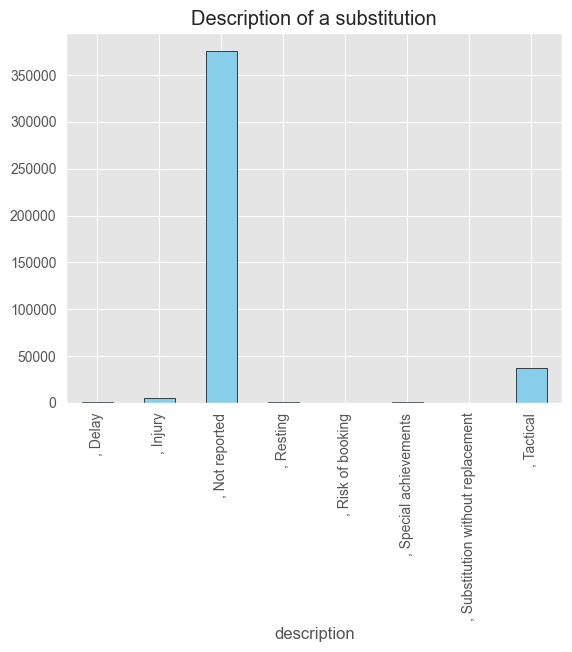

In [70]:
substitution.groupby('description').size().plot(kind = 'bar',
                                            title = 'Description of a substitution',
                                            y = "Number of occurrences",
                                            color = "skyblue",
                                            edgecolor = "black")

In [71]:
substitution.query("description == ', Substitution without replacement'")

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id
100127,23ebaeaadf1c2ec08e1dd14258cd16a9,2014-01-12,2340284,45,Substitutions,1085,212713,", Substitution without replacement",306463
100453,b471f73b0fdfdd023bb6d4aa046df68f,2014-03-09,2340309,90,Substitutions,2424,9830,", Substitution without replacement",257135
100514,da977fef8094c2e19db6f636074d30c1,2014-03-14,2340312,59,Substitutions,1075,119028,", Substitution without replacement",184953
140113,91672162e82ede98135cb9cdaddce2de,2014-02-23,2428056,66,Substitutions,1091,26099,", Substitution without replacement",65072
140666,b19ef2c70be495396068e847286e9955,2014-03-09,2445999,84,Substitutions,3060,25841,", Substitution without replacement",242760
140703,9b3bcbcfe56e97528cb8bc9a817d4498,2014-03-09,2446001,62,Substitutions,2672,59645,", Substitution without replacement",221317


In [72]:
substitution['description'] = substitution['description'].replace(', Substitution without replacement', ', Not reported')
substitution['description'].value_counts()

description
, Not reported            375813
, Tactical                 37643
, Injury                    5340
, Delay                      875
, Resting                    740
, Special achievements       549
, Risk of booking            289
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '368'),
  Text(1, 0, '418'),
  Text(2, 0, '131'),
  Text(3, 0, '6195'),
  Text(4, 0, '506')])

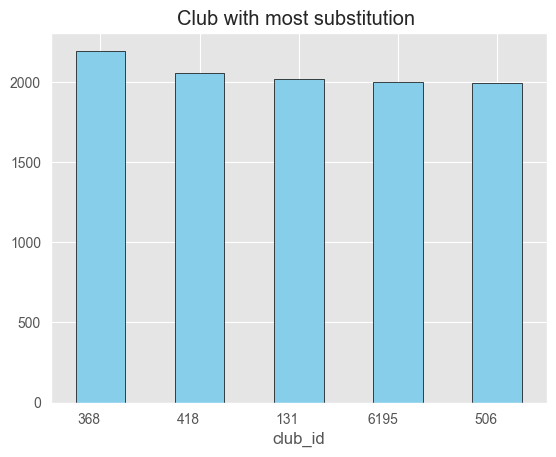

In [93]:
substitution.groupby('club_id').size().nlargest(5).plot(kind = 'bar',
                                            title = 'Club with most substitution ',
                                            y = "Number of occurrences",
                                            color = "skyblue",
                                            edgecolor = "black")
plt.xticks(rotation=0, ha='right')

<Axes: title={'center': 'Player with most substitution '}, xlabel='player_in_id'>

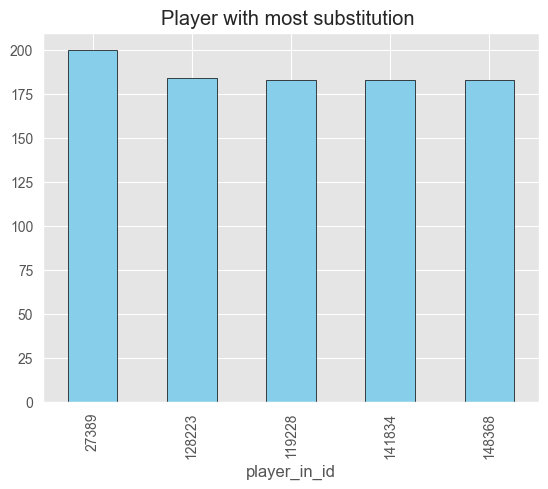

In [74]:
substitution.groupby('player_in_id').size().nlargest(5).plot(kind = 'bar',
                                            title = 'Player with most substitution ',
                                            y = "Number of occurrences",
                                            color = "skyblue",
                                            edgecolor = "black")

<h2> Cards <h2>

In [75]:
cards.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description'],
      dtype='object')

<Axes: title={'center': '10 game with more cards yellow or red'}, xlabel='game_id'>

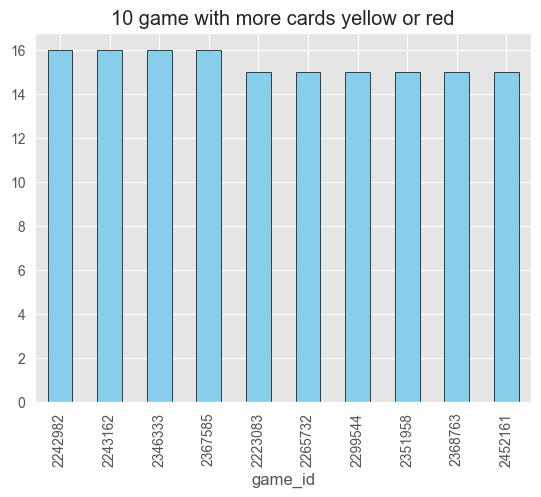

In [76]:
cards.groupby('game_id').count()['game_event_id'].nlargest(10).plot(kind = 'bar',
                                            title = '10 game with more cards yellow or red',
                                            y = "Number of occurrences",
                                            color = "skyblue",
                                            edgecolor = "black")

In [77]:
cards['description'].unique()

array(['1. Yellow card  , Mass confrontation', '1. Yellow card',
       'Red card  , Abuse', 'Yellow card', 'Second yellow  , Foul',
       '1. Yellow card  , Dissent', '1. Yellow card  , Foul',
       '1. Yellow card  , Serious foul', 'Yellow card  , Foul',
       'Second yellow  , Unsporting behaviour',
       'Second yellow  , Repeated Foul', 'Red card  , Violent conduct',
       '1. Yellow card  , Shooting ball', 'Red card  , Professional foul',
       '1. Yellow card  , Diving', '1. Yellow card  , Time wasting',
       '1. Yellow card  , Unsporting behaviour',
       '1. Yellow card  , Taking of shirt',
       '1. Yellow card  , Professional foul', 'Red card',
       '2. Yellow card', '3. Yellow card',
       '3. Yellow card  , Professional foul', '4. Yellow card  , Foul',
       '4. Yellow card  , Professional foul',
       '2. Yellow card  , Taking of shirt', '3. Yellow card  , Foul',
       '2. Yellow card  , Foul', 'Second yellow  , Dissent',
       '3. Yellow card  , Unsporti

<Axes: title={'center': 'Description of a most given cards'}, xlabel='description'>

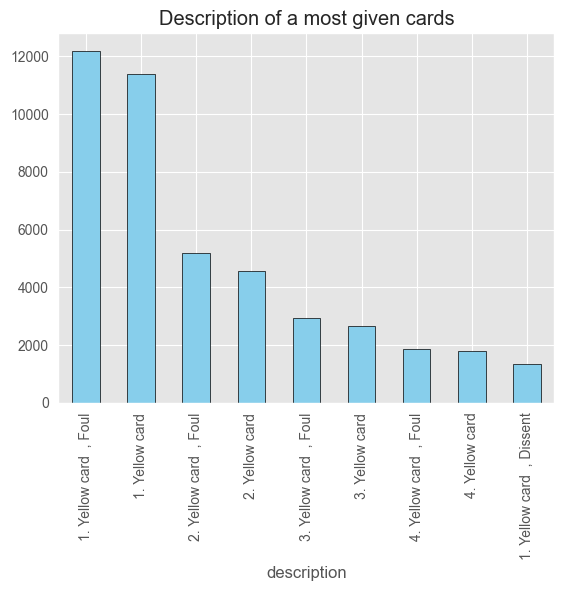

In [78]:
cards.groupby('description').size().nlargest(9).plot(kind = 'bar',
                                            title = 'Description of a most given cards',
                                            y = "Number of occurrences",
                                            color = "skyblue",
                                            edgecolor = "black")

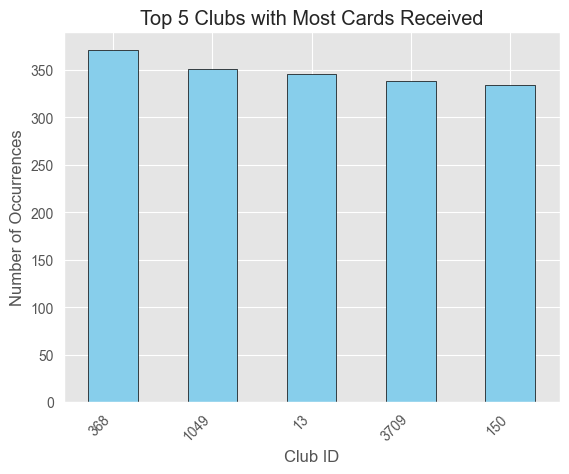

In [79]:
cards.groupby('club_id').size().nlargest(5).plot(kind='bar', 
                 title='Top 5 Clubs with Most Cards Received', 
                 xlabel='Club ID',
                 ylabel='Number of Occurrences',
                 color='skyblue', 
                 edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.show()

In [80]:
cards['club_id'].unique()

array([  610,   383,   506, ...,   971, 31367, 46889])

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '25557'),
  Text(1, 0, '63290'),
  Text(2, 0, '22969'),
  Text(3, 0, '53077'),
  Text(4, 0, '65467')])

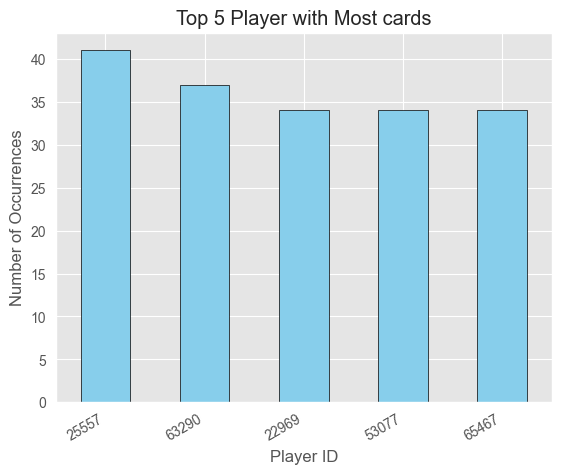

In [81]:
cards.groupby('player_id').size().nlargest(5).plot(kind='bar', 
                 title='Top 5 Player with Most cards', 
                 xlabel='Player ID',
                 ylabel='Number of Occurrences',
                 color='skyblue', 
                 edgecolor='black')
plt.xticks(rotation=30, ha='right')

<h2>Goal<h2>

In [82]:
goal.columns

Index(['game_event_id', 'date', 'game_id', 'minute', 'type', 'club_id',
       'player_id', 'description', 'player_assist_id'],
      dtype='object')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '4115636'),
  Text(1, 0, '3224824'),
  Text(2, 0, '4104069'),
  Text(3, 0, '2599284'),
  Text(4, 0, '3450515')])

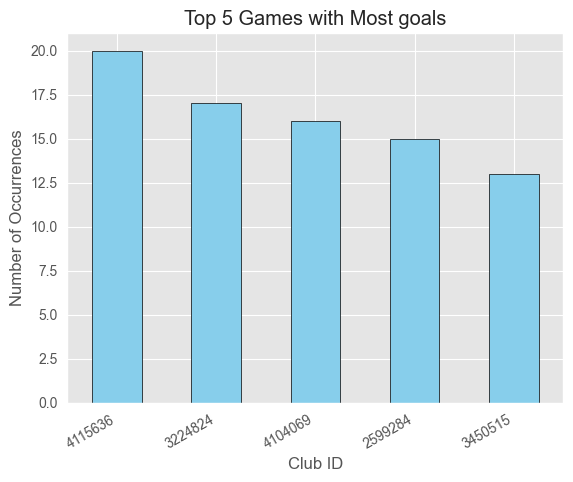

In [83]:
goal.groupby('game_id').size().nlargest(5).plot(kind='bar', 
                 title='Top 5 Games with Most goals', 
                 xlabel='Club ID',
                 ylabel='Number of Occurrences',
                 color='skyblue', 
                 edgecolor='black')
plt.xticks(rotation=30, ha='right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '27'),
  Text(1, 0, '131'),
  Text(2, 0, '418'),
  Text(3, 0, '281'),
  Text(4, 0, '371')])

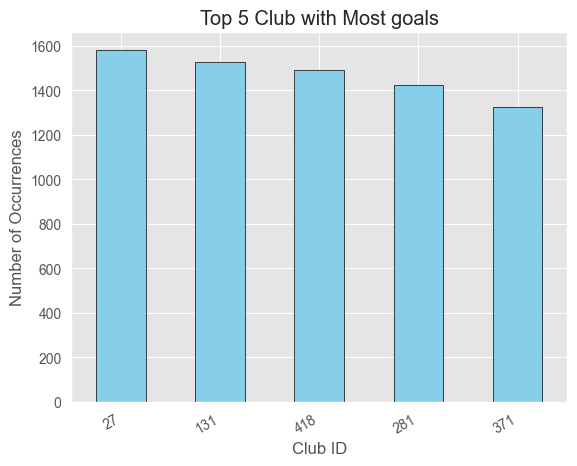

In [84]:
goal.groupby('club_id').size().nlargest(5).plot(kind='bar', 
                 title='Top 5 Club with Most goals', 
                 xlabel='Club ID',
                 ylabel='Number of Occurrences',
                 color='skyblue', 
                 edgecolor='black')
plt.xticks(rotation=30, ha='right')

In [85]:
goal.loc[goal['player_assist_id']== 0].value_counts().sum()

150044

In [86]:
goal.loc[goal['player_assist_id'] != 0].value_counts().sum()

30857

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '38253'),
  Text(1, 0, '28003'),
  Text(2, 0, '8198'),
  Text(3, 0, '132098'),
  Text(4, 0, '44352')])

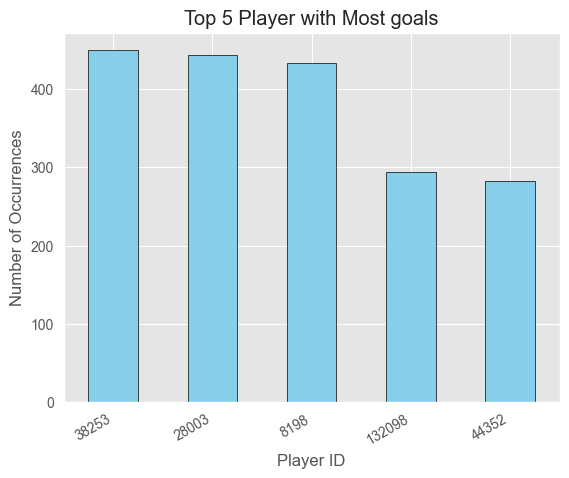

In [87]:
goal.groupby('player_id').size().nlargest(5).plot(kind='bar', 
                 title='Top 5 Player with Most goals', 
                 xlabel='Player ID',
                 ylabel='Number of Occurrences',
                 color='skyblue', 
                 edgecolor='black')
plt.xticks(rotation=30, ha='right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '8198'),
  Text(1, 0, '28003'),
  Text(2, 0, '38253'),
  Text(3, 0, '3455'),
  Text(4, 0, '81808')])

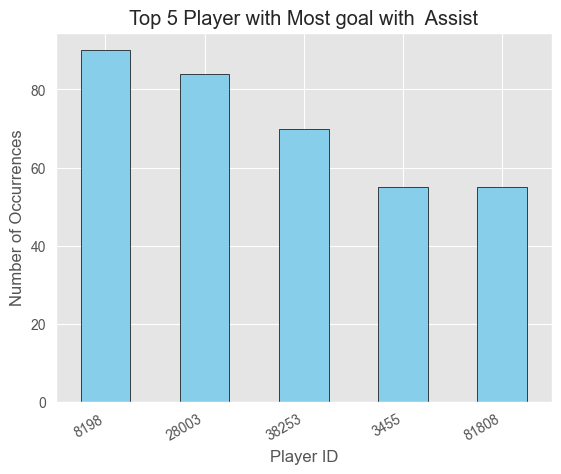

In [95]:
goal_with_assist = goal.loc[goal['player_assist_id'] != 0]
assist.groupby('player_id').size().nlargest(5).plot(kind='bar', 
                 title='Top 5 Player with Most goal with  Assist', 
                 xlabel='Player ID',
                 ylabel='Number of Occurrences',
                 color='skyblue', 
                 edgecolor='black')
plt.xticks(rotation=30, ha='right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '8198'),
  Text(1, 0, '28003'),
  Text(2, 0, '38253'),
  Text(3, 0, '3455'),
  Text(4, 0, '81808')])

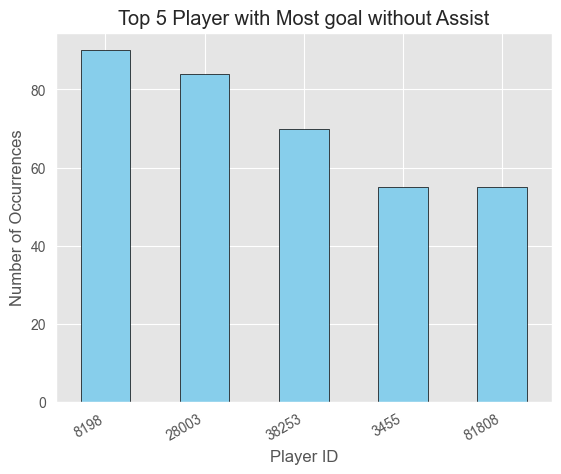

In [94]:
goal_without_assist = goal.loc[goal['player_assist_id'] == 0]
assist.groupby('player_id').size().nlargest(5).plot(kind='bar', 
                 title='Top 5 Player with Most goal without Assist', 
                 xlabel='Player ID',
                 ylabel='Number of Occurrences',
                 color='skyblue', 
                 edgecolor='black')
plt.xticks(rotation=30, ha='right')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '45320'),
  Text(1, 0, '35207'),
  Text(2, 0, '69633'),
  Text(3, 0, '36139'),
  Text(4, 0, '35664')])

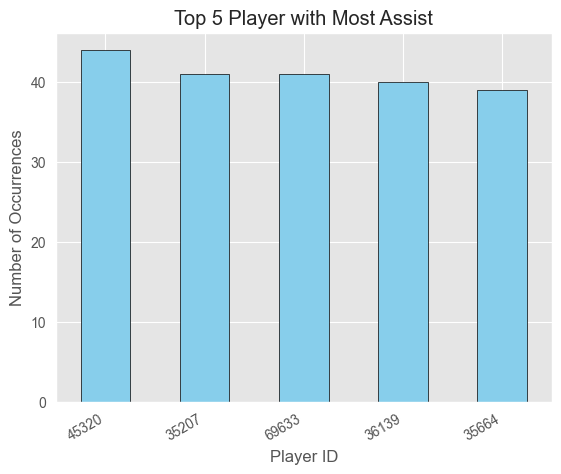

In [88]:
assist = goal.loc[goal['player_assist_id'] != 0]
assist.groupby('player_assist_id').size().nlargest(5).plot(kind='bar', 
                 title='Top 5 Player with Most Assist', 
                 xlabel='Player ID',
                 ylabel='Number of Occurrences',
                 color='skyblue', 
                 edgecolor='black')
plt.xticks(rotation=30, ha='right')